## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [7]:
df
normal = stats.normal

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


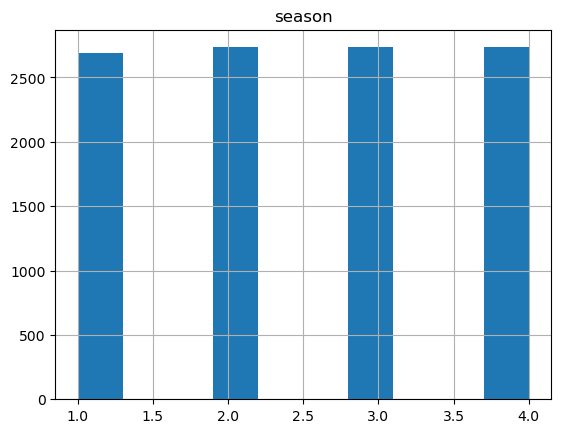

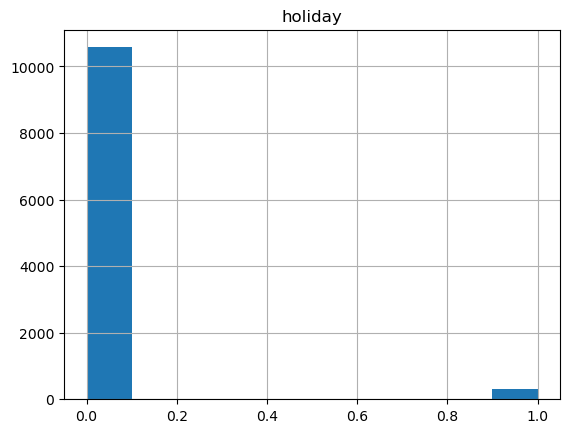

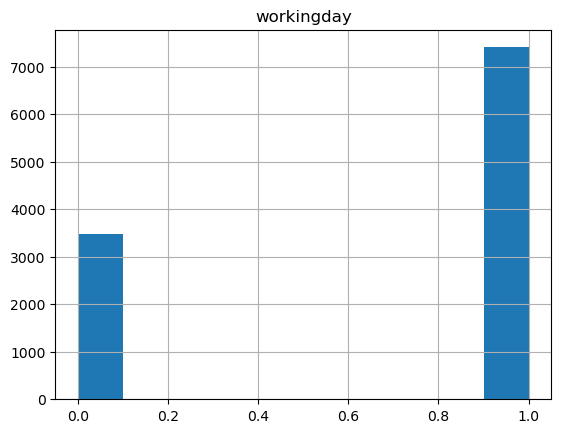

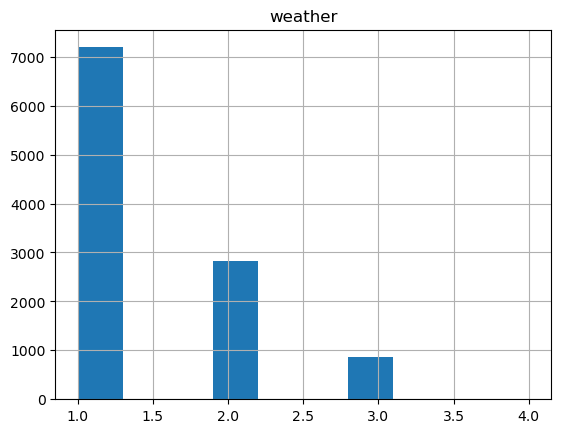

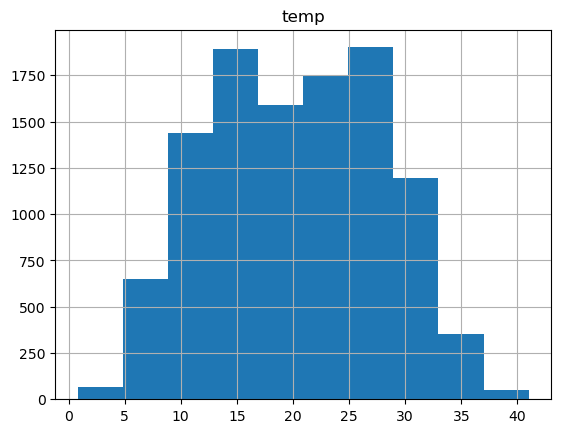

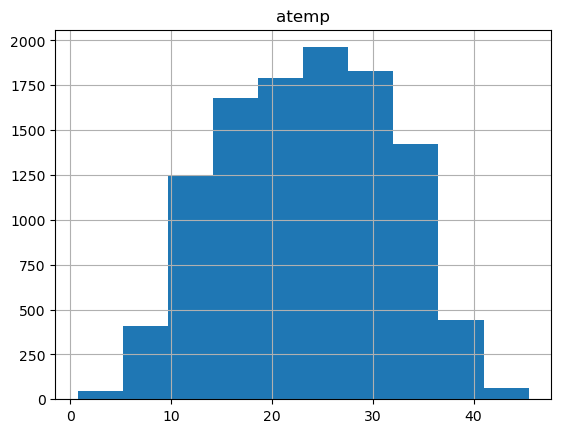

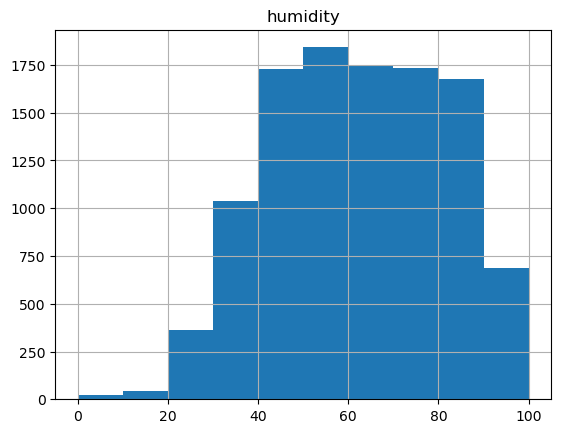

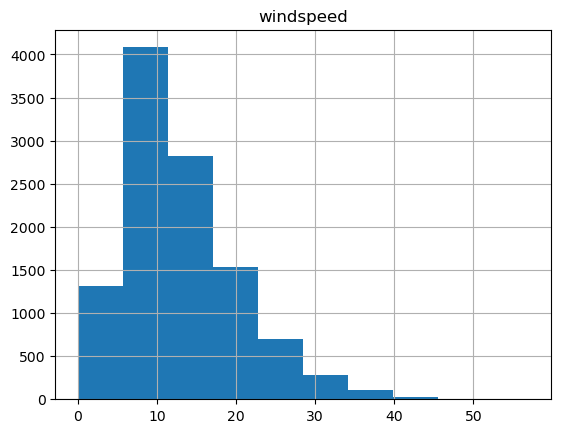

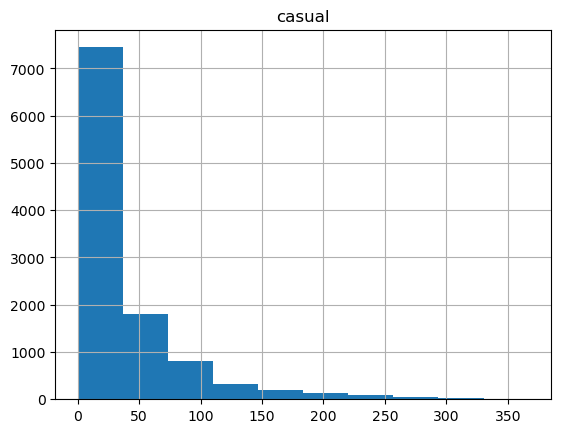

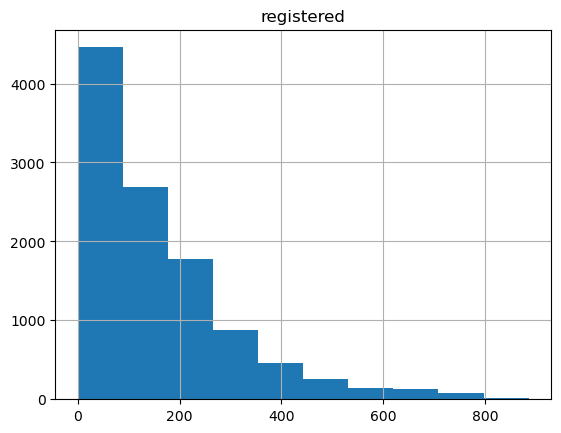

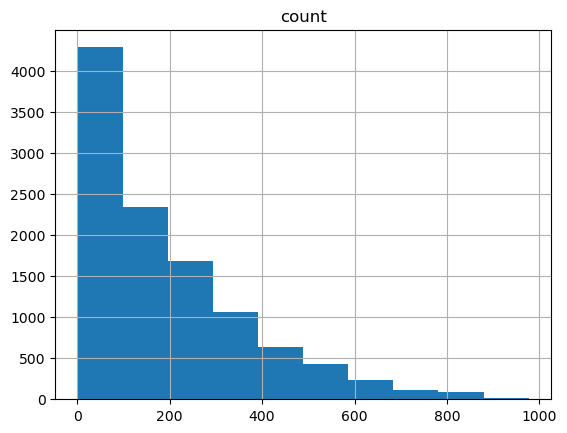

In [72]:
for i in df.columns:
    temp_col = df[i]
    temp_col.hist()
    plt.title(i)
    plt.show()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [10]:
df.mean()

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [13]:
dispersion = (df.std() ** 2)
dispersion

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [25]:
for i in df.columns:
    print(f'{i}')
    print(f'Эксцесс: {kurtosis(df[i])}')
    print(f'Ассиметрия: {skew(df[i])}')
    print()

season
Эксцесс: -1.3555899543299803
Ассиметрия: -0.007074695296526289

holiday
Эксцесс: 30.032624417535125
Ассиметрия: 5.6597371332540805

workingday
Эксцесс: -1.3977369782030475
Ассиметрия: -0.7760560687198784

weather
Эксцесс: 0.39480007841067577
Ассиметрия: 1.2433126730817885

temp
Эксцесс: -0.9146613849825282
Ассиметрия: 0.0036903358354289715

atemp
Эксцесс: -0.8502363689497141
Ассиметрия: -0.10254538108264065

humidity
Эксцесс: -0.760019710012902
Ассиметрия: -0.0863232869219358

windspeed
Эксцесс: 0.629292367034056
Ассиметрия: 0.5886853963635482

casual
Эксцесс: 7.547610130561701
Ассиметрия: 2.495404491505502

registered
Эксцесс: 2.6243238654959855
Ассиметрия: 1.5245944734221468

count
Эксцесс: 1.2989447727380323
Ассиметрия: 1.241895058803035



### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [78]:
max_dispersion = []

for i in df.columns:
#     temp_dispersion = stats.tstd(df[i])
    temp_dispersion = df[i].std() ** 2
    print(f'{i} dispersion = {temp_dispersion}')
    max_dispersion.append(temp_dispersion)

max_dispersion = max(max_dispersion)

season dispersion = 1.2458450888401458
holiday dispersion = 0.027755177029477718
workingday dispersion = 0.21730437065606648
weather dispersion = 0.4017513528731466
temp dispersion = 60.70887229692924
atemp dispersion = 71.81885577841805
humidity dispersion = 370.3713058480327
windspeed dispersion = 66.65966976133899
casual dispersion = 2496.04921936629
registered dispersion = 22812.789514322714
count dispersion = 32813.31315347224


In [79]:
max_dispersion

32813.31315347224

<Axes: xlabel='holiday', ylabel='Density'>

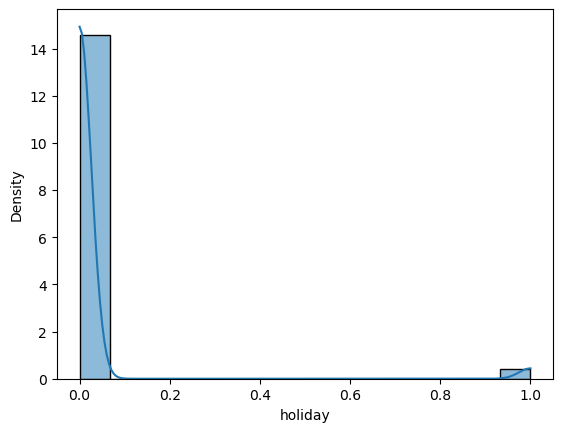

In [80]:
df_count = df['count']
sns.histplot(df_holiday, kde=True, stat='density')

In [81]:
def my_norm_confidence(df_i=df_count, alpha=0.9):
    interval = stats.norm.interval(alpha, loc=df_i.mean(), scale=df_i.std())
    return interval

confidence = my_norm_confidence()
print(confidence)

(-106.3819799723396, 489.53024379743596)


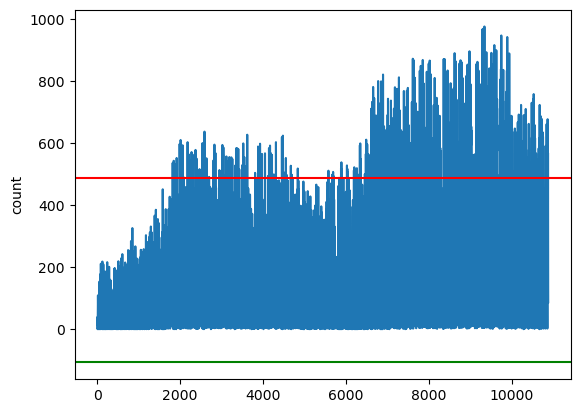

In [82]:
sns.lineplot(df_count)
plt.axhline(confidence[0], color='g')
plt.axhline(confidence[1], color='r')
# df_count.plot()

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [98]:
sigma_anomaly = {}

for i in df.columns:
    temp_df = df[i]
    upper = df[i].mean() + 3*df[i].std()
    lower = df[i].mean() - 3*df[i].std()
    temp_df = temp_df[temp_df >= upper]
    sigma_anomaly[i] = temp_df.count()
    print(f'{i} = {temp_df.count()}')

max = {i:j for i,j in sigma_anomaly.items() if j == max(sigma_anomaly.values())}

season = 0
holiday = 311
workingday = 0
weather = 1
temp = 0
atemp = 0
humidity = 0
windspeed = 67
casual = 292
registered = 235
count = 147


In [99]:
max

{'holiday': 311}

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

Для создания выводов,было бы хорошо понимать значение каждой метрики, например как я понимаю параметры temp и atemp практически одно и то же, соответственно их сильная положительная корреляция в расчет не берется.

Видимо наша контрольная метрика это count

Положительная корреляция (casual:count, registered:count, temp/atemp:count)

Отрицательная корреляция (humidity:count, casual:workingday)

Корреляции по типу windspeed:humidity не описывались, так как являются взаимосвязанными погодными условиями

<Axes: >

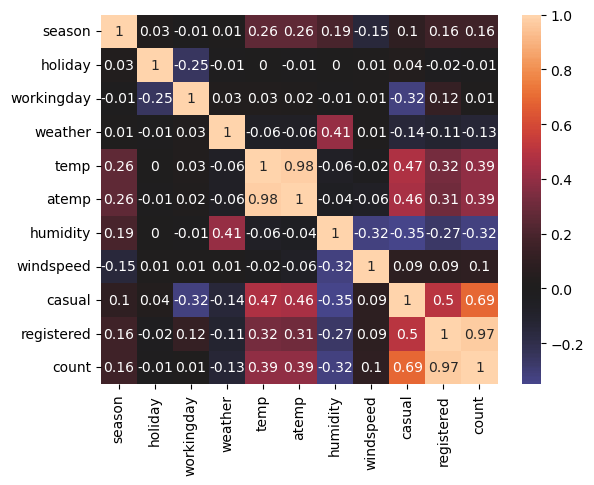

In [113]:
correlation = df.corr()
correlation = round(correlation, 2)

sns.heatmap(correlation, center=0, annot=True)